In [2]:
import pandas as pd

In [12]:
# Load dataset

raw_data=pd.read_csv('Purify_Coaid.csv', encoding='latin1')
raw_data.head()

,uuid,human_written_content,aigenerated_content,model,num_completion_token,num_original_token,num_prompt_token,num_iagenerated_token,original_label,source_type,...,pre_post_GPT,dataset_source,GPT-3.5 NLI,GPT_NLI_plus_ai_label,AlignScore,BERTScore_Precision,BERTScore_Recall,BERTScore_F1,Semantic_Distance,Prompt
0,e02fdcb4-3c9f-450b-afdc-90457ef57d9f,stay home if you are having symptoms of covid-...,New Fake News Article:\nLocal Restaurant Shuts...,gpt-3.5-turbo-0125,179,93,219,398,real,AI Machine,...,pre-GPT,CoAID,not-entailment,not-entailment_fake,0.036719,0.825623,0.838333,0.831930,0.544656,Minor
1,a45775f5-a285-4c3f-b94b-c15c1ad9db9e,"""When you put people up on a pedestal, the onl...","""When you put clowns up on a pedestal, the onl...",gpt-3.5-turbo-0125,47,38,159,206,real,AI Machine,...,pre-GPT,CoAID,The NLI relationship between the premise and h...,The NLI relationship between the premise and h...,0.028660,0.902462,0.947269,0.924323,0.466864,Minor
2,652cbf6a-66fd-412d-b543-1005af6467f3,researchers say aspirin may help people hospit...,Research Suggests Chocolate Could Be a Game-Ch...,gpt-3.5-turbo-0125,75,84,208,283,real,AI Machine,...,pre-GPT,CoAID,Not Entailment,Not Entailment_fake,0.013888,0.869348,0.851870,0.860520,0.547235,Minor
3,96434058-9cd4-4bce-89ba-424ea3487e55,"""So what is Ominshambles @BorisJohnson going t...","""Breaking news! @BorisJohnson announces plans ...",gpt-3.5-turbo-0125,46,45,193,239,real,AI Machine,...,pre-GPT,CoAID,Not Entailment,Not Entailment_fake,0.046054,0.834877,0.801868,0.818039,0.484509,Minor
4,df8423ae-d28c-420c-8956-c6e999f9c6ce,what your doctor is reading on medscape.com ap...,Breaking News: Outpatient Visits Plummet by 60...,gpt-3.5-turbo-0125,109,83,218,327,real,AI Machine,...,pre-GPT,CoAID,not-entailment,not-entailment_fake,0.240086,0.873131,0.867202,0.870156,0.256152,Minor


In [71]:
# remove duplicates based on ai-generated content

# Count the total number of rows
total_rows = len(raw_data)
print(f"Total rows before deduplication: {total_rows}")

Total rows before deduplication: 600


In [72]:
# Deduplicate based on content and remove nan values
deduplicated_df = raw_data.drop_duplicates(subset='aigenerated_content')  
# Drop rows with any NaN values
deduplicated_df = deduplicated_df.dropna()

In [73]:
# Count the total number of rows
total_rows_after_deduplication = len(deduplicated_df)
print(f"Total rows after deduplication: {total_rows_after_deduplication}")

Total rows after deduplication: 600


In [74]:
F3_Consistency=deduplicated_df

In [75]:
F3_Consistency['Prompt Veracity']=F3_Consistency['Prompt']+' '+F3_Consistency['ai_generated_label']

In [76]:
F3_Consistency.head()

,uuid,human_written_content,aigenerated_content,model,num_completion_token,num_original_token,num_prompt_token,num_iagenerated_token,original_label,source_type,...,dataset_source,GPT-3.5 NLI,GPT_NLI_plus_ai_label,AlignScore,BERTScore_Precision,BERTScore_Recall,BERTScore_F1,Semantic_Distance,Prompt,Prompt Veracity
0,e02fdcb4-3c9f-450b-afdc-90457ef57d9f,stay home if you are having symptoms of covid-...,New Fake News Article:\nLocal Restaurant Shuts...,gpt-3.5-turbo-0125,179,93,219,398,real,AI Machine,...,CoAID,not-entailment,not-entailment_fake,0.036719,0.825623,0.838333,0.831930,0.544656,Minor,Minor fake
1,a45775f5-a285-4c3f-b94b-c15c1ad9db9e,"""When you put people up on a pedestal, the onl...","""When you put clowns up on a pedestal, the onl...",gpt-3.5-turbo-0125,47,38,159,206,real,AI Machine,...,CoAID,The NLI relationship between the premise and h...,The NLI relationship between the premise and h...,0.028660,0.902462,0.947269,0.924323,0.466864,Minor,Minor fake
2,652cbf6a-66fd-412d-b543-1005af6467f3,researchers say aspirin may help people hospit...,Research Suggests Chocolate Could Be a Game-Ch...,gpt-3.5-turbo-0125,75,84,208,283,real,AI Machine,...,CoAID,Not Entailment,Not Entailment_fake,0.013888,0.869348,0.851870,0.860520,0.547235,Minor,Minor fake
3,96434058-9cd4-4bce-89ba-424ea3487e55,"""So what is Ominshambles @BorisJohnson going t...","""Breaking news! @BorisJohnson announces plans ...",gpt-3.5-turbo-0125,46,45,193,239,real,AI Machine,...,CoAID,Not Entailment,Not Entailment_fake,0.046054,0.834877,0.801868,0.818039,0.484509,Minor,Minor fake
4,df8423ae-d28c-420c-8956-c6e999f9c6ce,what your doctor is reading on medscape.com ap...,Breaking News: Outpatient Visits Plummet by 60...,gpt-3.5-turbo-0125,109,83,218,327,real,AI Machine,...,CoAID,not-entailment,not-entailment_fake,0.240086,0.873131,0.867202,0.870156,0.256152,Minor,Minor fake


In [67]:

# Function to extract and standardize labels
def extract_standard_label(label):
    label = label.lower()  # Normalize case
    label = label.replace("not entailment", "not-entailment")  # Replace variations of "not entailment" with "not-entailment"
    label = label.replace("entailment", "entailment")  # Standardize "entailment" just in case

    if "not-entailment" in label and "_fake" in label:
        return "not-entailment_fake"
    elif "entailment" in label and "_real" in label:
        return "entailment_real"
    elif "not-entailment" in label and "_real" in label:
        return "not-entailment_real"
    elif "entailment" in label and "_fake" in label:
        return "entailment_fake"
    else:
        return "unknown"  # Default value for unexpected formats

# Apply the function to create a new column
F3_Consistency["GPT_NLI_plus_ai_label_cleaned"] = F3_Consistency["GPT_NLI_plus_ai_label"].apply(extract_standard_label)

# Save the updated DataFrame to a new file (optional)
F3_Consistency.to_csv("standardized_labels_dataset.csv", index=False)

# Display the first few rows of the updated DataFrame
print(F3_Consistency.head())


                                   uuid  \
0  e02fdcb4-3c9f-450b-afdc-90457ef57d9f   
1  a45775f5-a285-4c3f-b94b-c15c1ad9db9e   
2  652cbf6a-66fd-412d-b543-1005af6467f3   
3  96434058-9cd4-4bce-89ba-424ea3487e55   
4  df8423ae-d28c-420c-8956-c6e999f9c6ce   

                               human_written_content  \
0  stay home if you are having symptoms of covid-...   
1  "When you put people up on a pedestal, the onl...   
2  researchers say aspirin may help people hospit...   
3  "So what is Ominshambles @BorisJohnson going t...   
4  what your doctor is reading on medscape.com ap...   

                                 aigenerated_content               model  \
0  New Fake News Article:\nLocal Restaurant Shuts...  gpt-3.5-turbo-0125   
1  "When you put clowns up on a pedestal, the onl...  gpt-3.5-turbo-0125   
2  Research Suggests Chocolate Could Be a Game-Ch...  gpt-3.5-turbo-0125   
3  "Breaking news! @BorisJohnson announces plans ...  gpt-3.5-turbo-0125   
4  Breaking News: Outpat

/var/folders/st/crptbztd6q11z6f5z5p96v6h0000gn/T/ipykernel_28961/3713653257.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  F3_Consistency["GPT_NLI_plus_ai_label_cleaned"] = F3_Consistency["GPT_NLI_plus_ai_label"].apply(extract_standard_label)


In [68]:
# Remove Logically inconsistent instances labelled as real 
# Filter out not entailment real and filter out entailment fake


# Define the labels to filter out
labels_to_filter = ["not-entailment_real", "entailment_fake"]

# Count the number of filtered-out instances
filtered_out_count = F3_Consistency[F3_Consistency["GPT_NLI_plus_ai_label"].isin(labels_to_filter)].shape[0]

# Filter out rows with the specified labels
NLI_filtered_df = F3_Consistency[F3_Consistency["GPT_NLI_plus_ai_label"].isin(labels_to_filter)]

# Save the filtered DataFrame to a new file (optional)
NLI_filtered_df.to_csv("NLI_filtered_dataset.csv", index=False)

# Print the number of filtered-out instances
print(f"Number of filtered-out instances: {filtered_out_count}")

# Display the first few rows of the filtered DataFrame
print(NLI_filtered_df.head())



Number of filtered-out instances: 20
                                     uuid  \
17   b2d6b01e-0d47-49d8-8e1b-96e7c84bc5b2   
118  42884c9f-2580-405c-b5c0-595f59042de4   
201  cfa2a920-9c24-4720-8b9d-8be2ab20a77e   
302  4488ca16-cc2f-47ba-b671-f4181b72a22e   
345  d51996ba-8118-42f0-98c9-e87d0791a7ea   

                                 human_written_content  \
17   scientists have found that four young males wh...   
118  "@SaudiMOH @SaudiMOH937 When can we expect the...   
201  "When you put people up on a pedestal, the onl...   
302  a new poll found that 58 percent of respondent...   
345  "According to WHO: Drinking alcohol does not p...   

                                   aigenerated_content               model  \
17   Scientists Discover Mutations in X Chromosome ...  gpt-3.5-turbo-0125   
118  BREAKING: Saudi Ministry of Health under fire ...  gpt-3.5-turbo-0125   
201  Shocking reveal: Celebrities caught in scandal...  gpt-3.5-turbo-0125   
302  A recent survey revealed t

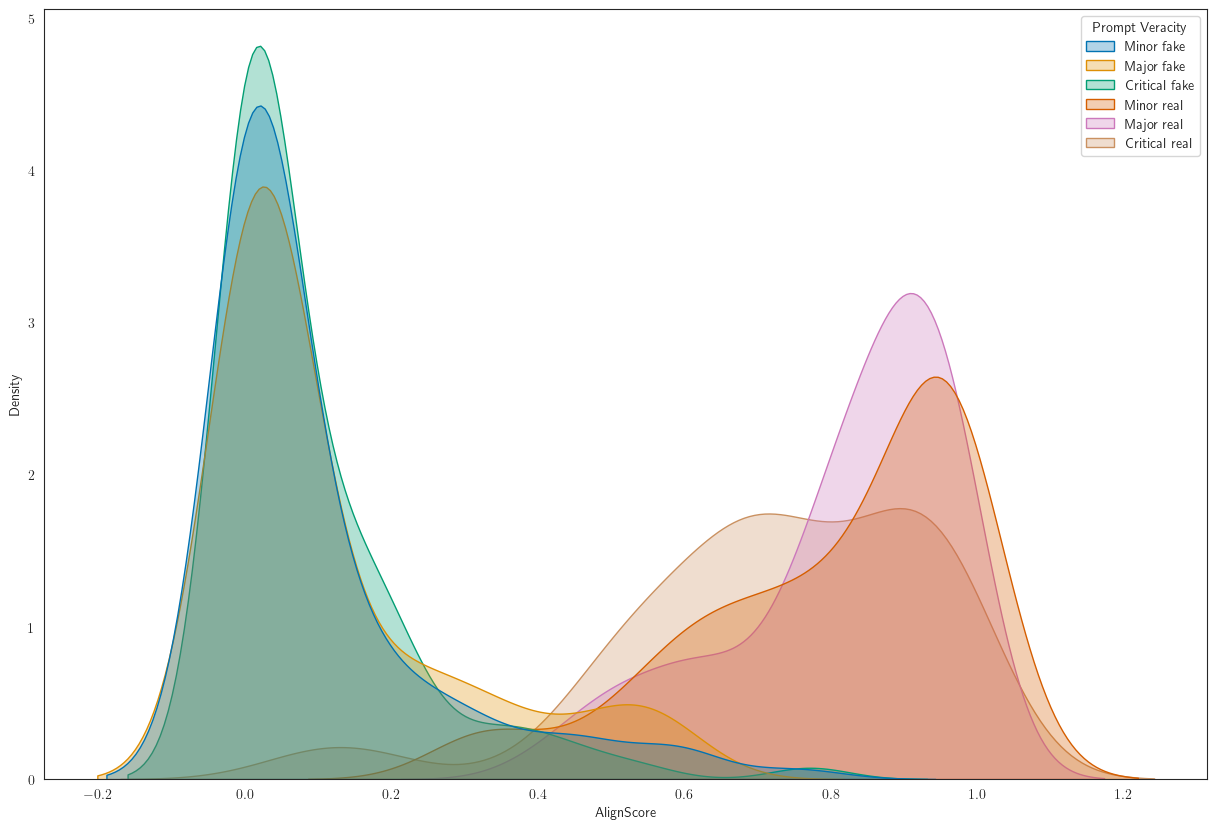

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(15, 10))  # You can adjust the numbers (10, 6) to your preferred size

sns.kdeplot(
   data=F3_Consistency, x="AlignScore", hue="Prompt Veracity",
   fill=True, common_norm=False, palette="colorblind",
   alpha=.3, linewidth=1,
)

plt.show()  # To display the plot

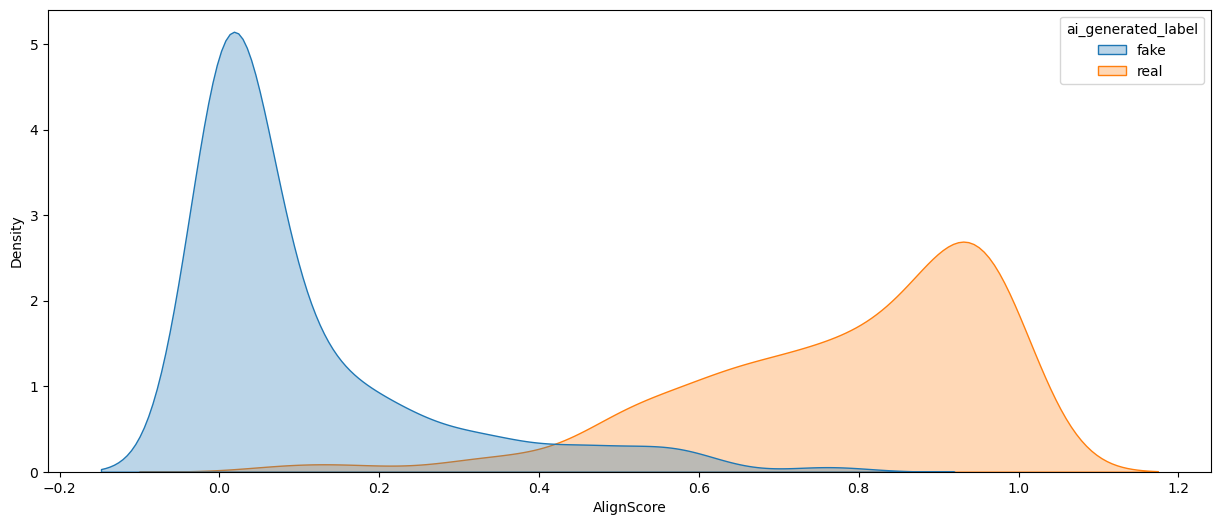

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(15, 6))  # You can adjust the numbers (10, 6) to your preferred size

sns.kdeplot(
   data=F3_Consistency, x="AlignScore", hue="ai_generated_label",
   fill=True, common_norm=False, palette=None,
   alpha=.3, linewidth=1,
)

plt.show()  # To display the plot

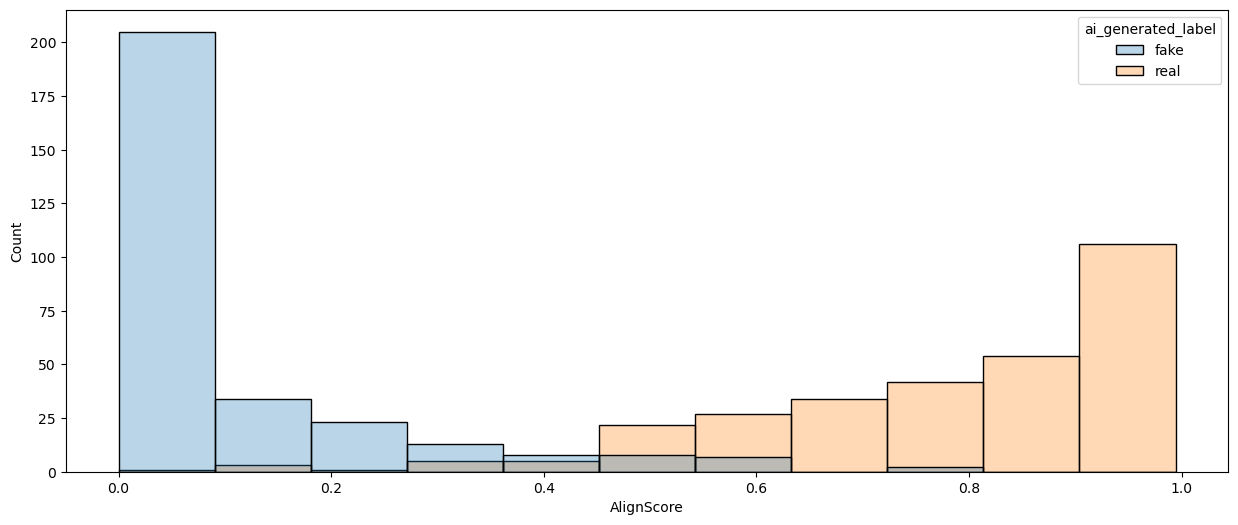

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(15, 6))  # You can adjust the numbers (10, 6) to your preferred size

sns.histplot(
   data=F3_Consistency, x="AlignScore", hue="ai_generated_label",
   fill=True, common_norm=False, palette=None,
   alpha=.3, linewidth=1,
)

plt.show()  # To display the plot

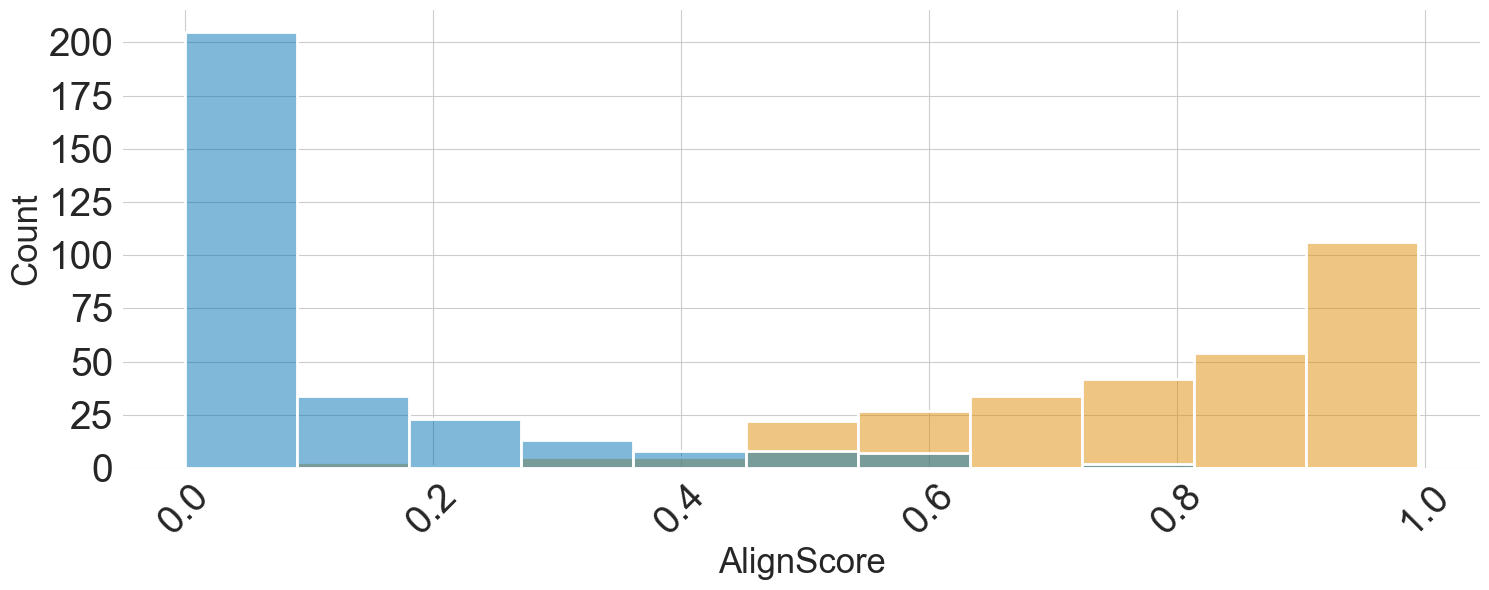

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure and white background
plt.figure(figsize=(15, 6))
sns.set_style("white")

# Plot the histogram
ax = sns.histplot(
    data=F3_Consistency, x="AlignScore", hue="ai_generated_label",
    fill=True, common_norm=False, palette="colorblind", legend=False,
    alpha=.5, linewidth=2
)

# plt.xlabel('AlignScore', fontsize=20)
# plt.ylabel('Count', fontsize=20)

# Increase the size of the numbers on the y and x axes
ax.tick_params(axis='both', labelsize=17)  # Adjust '14' to your desired font size

# Display only horizontal grid lines
ax.yaxis.grid(True)  # <-- This is the line that adds the horizontal grid
ax.xaxis.grid(True)  # <-- This is the line that adds the horizontal grid
# Remove borders
for spine in ax.spines.values():
    spine.set_visible(False)

# Set the rotation of the x-axis tick labels
plt.xticks(rotation=45, fontsize=28)  # Change rotation to 45 degrees for inclination
plt.yticks(fontsize=28)
plt.xlabel('AlignScore', fontsize=25)
plt.ylabel('Count', fontsize=25)

# Adjust layout to fit legend
plt.tight_layout()

# Display the plot
plt.show()

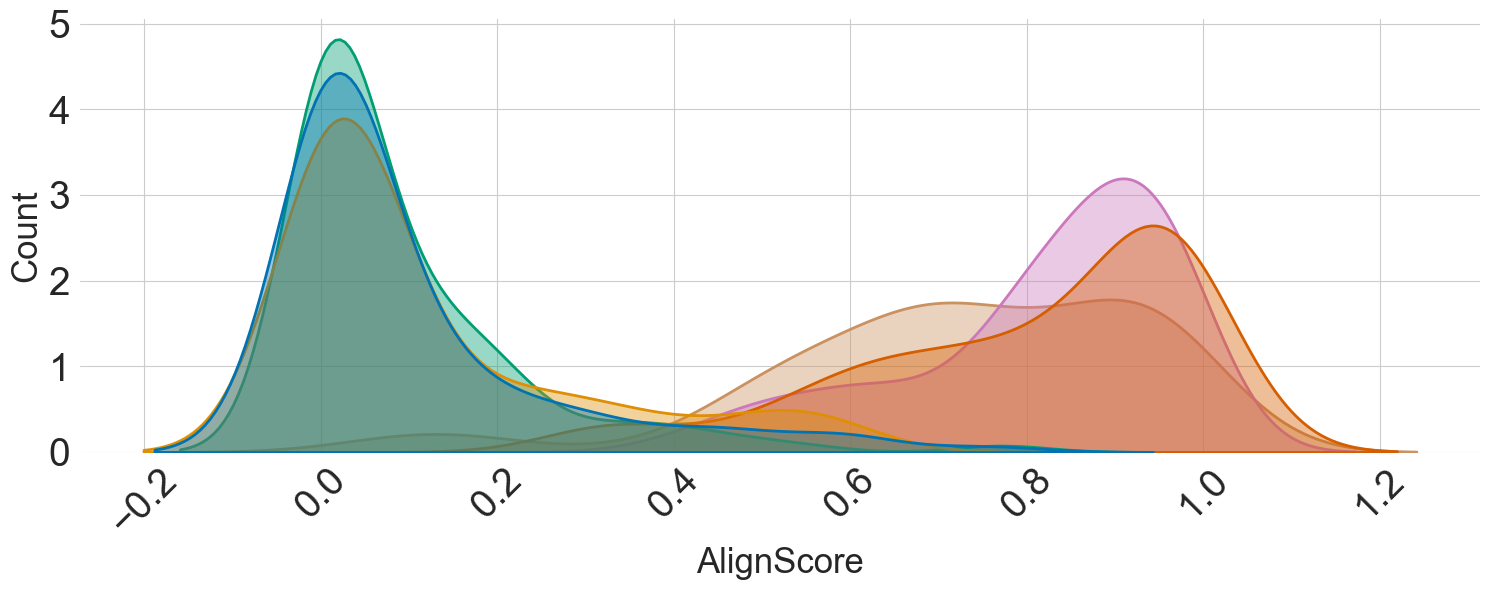

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure and white background
plt.figure(figsize=(15, 6))
sns.set_style("white")

# Define a color palette. Adjust the colors as per your requirements.
unique_veracity = F3_Consistency['Prompt Veracity'].unique()
# palette = dict(zip(unique_veracity, sns.color_palette("tab10", len(unique_veracity))))

# KDE plot
ax = sns.kdeplot(
    data=F3_Consistency, x="AlignScore", hue="Prompt Veracity",
    fill=True, common_norm=False, palette="colorblind",legend=False,
    alpha=.4, linewidth=2,
)

ax.tick_params(axis='both', labelsize=14)
# Set the title and labels
# plt.title('Distribution of AlignScore by Veracity', fontsize=18)
plt.xlabel('AlignScore', fontsize=20)
plt.ylabel('Density', fontsize=20)

# Display legend at the bottom in a horizontal line
# plt.legend( labels= ['Minor Real','Critical Real', 'Major Real', 'Critical Fake','Major Fake','Minor Fake'],
#            fontsize='large', title_fontsize='20',
#            loc='upper center', bbox_to_anchor=(0.5, -0.2),
#            ncol=len(unique_veracity))


# Increase the size of the numbers on the y and x axes
ax.tick_params(axis='both', labelsize=17)  # Adjust '14' to your desired font size
# Show grid
ax.grid(True)

# Display only horizontal grid lines
ax.yaxis.grid(False)

# Remove borders
for spine in ax.spines.values():
    spine.set_visible(False)

# Display only horizontal grid lines
ax.yaxis.grid(True)  # <-- This is the line that adds the horizontal grid

# Show grid
ax.grid(True)

# Set the rotation of the x-axis tick labels
plt.xticks(rotation=45, fontsize=28)  # Change rotation to 45 degrees for inclination
plt.yticks(fontsize=28)
plt.xlabel('AlignScore', fontsize=25)
plt.ylabel('Count', fontsize=25)

# Adjust layout to fit legend
plt.tight_layout()

# Display the plot
plt.show()

In [25]:
F3_Consistency["AlignScore"].describe()

count    600.000000
mean       0.442689
std        0.381385
min        0.000202
25%        0.026420
50%        0.464922
75%        0.826988
max        0.994397
Name: AlignScore, dtype: float64

In [26]:
# Filter F3_Consistency by ai_generated_label
filtered_data = F3_Consistency[F3_Consistency['ai_generated_label'] == "real"]

# Describe the AlignScore column for the filtered data
description = filtered_data["AlignScore"].describe()

print(description)

count    300.000000
mean       0.782897
std        0.187645
min        0.079351
25%        0.659013
50%        0.827510
75%        0.941046
max        0.994397
Name: AlignScore, dtype: float64


In [27]:
# Filter F3_Consistency by ai_generated_label
filtered_data = F3_Consistency[F3_Consistency['ai_generated_label'] == "fake"]

# Describe the AlignScore column for the filtered data
description = filtered_data["AlignScore"].describe()

print(description)

count    300.000000
mean       0.102480
std        0.154681
min        0.000202
25%        0.006090
50%        0.026336
75%        0.132942
max        0.771437
Name: AlignScore, dtype: float64


In [28]:
F3_Consistency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uuid                   600 non-null    object 
 1   human_written_content  600 non-null    object 
 2   aigenerated_content    600 non-null    object 
 3   model                  600 non-null    object 
 4   num_completion_token   600 non-null    int64  
 5   num_original_token     600 non-null    int64  
 6   num_prompt_token       600 non-null    int64  
 7   num_iagenerated_token  600 non-null    int64  
 8   original_label         600 non-null    object 
 9   source_type            600 non-null    object 
 10  ai_generated_label     600 non-null    object 
 11  article_type           600 non-null    object 
 12  pre_post_GPT           600 non-null    object 
 13  dataset_source         600 non-null    object 
 14  GPT-3.5 NLI            600 non-null    object 
 15  GPT_NL

In [29]:
F3_Consistency.ai_generated_label.value_counts()

ai_generated_label
fake    300
real    300
Name: count, dtype: int64

In [30]:
import numpy as np
real_data = F3_Consistency[F3_Consistency['ai_generated_label'] == 'real']
fake_data = F3_Consistency[F3_Consistency['ai_generated_label'] == 'fake']

In [31]:
# For fake news
threshold_fake_percentile = np.percentile(fake_data['AlignScore'], 90)
threshold_fake_std = fake_data['AlignScore'].mean() + (fake_data['AlignScore'].std())

# Averaging the thresholds
fake_hybrid_threshold = np.mean([threshold_fake_percentile, threshold_fake_std])

print("Optimal Threshold based on hybrid method:", fake_hybrid_threshold)


Optimal Threshold based on hybrid method: 0.29703965414083044


In [32]:

# For real news
threshold_real_percentile = np.percentile(real_data['AlignScore'], 90)
threshold_real_std = real_data['AlignScore'].mean() - (real_data['AlignScore'].std())

# Averaging the thresholds
true_hybrid_threshold = np.mean([threshold_real_percentile, threshold_real_std])

print("Optimal Threshold based on hybrid method:", true_hybrid_threshold)

Optimal Threshold based on hybrid method: 0.7843044502915627


In [33]:
F3_Consistency['ai_generated_label'].value_counts()

ai_generated_label
fake    300
real    300
Name: count, dtype: int64

In [34]:
# Filter F3_Consistency by ai_generated_label
filtered_data = F3_Consistency[F3_Consistency['ai_generated_label'] == "real"]

# Describe the AlignScore column for the filtered data
description = filtered_data["AlignScore"].describe()

print(description)

count    300.000000
mean       0.782897
std        0.187645
min        0.079351
25%        0.659013
50%        0.827510
75%        0.941046
max        0.994397
Name: AlignScore, dtype: float64


In [35]:
# Filter F3_Consistency by ai_generated_label
filtered_data = F3_Consistency[F3_Consistency['ai_generated_label'] == "fake"]

# Describe the AlignScore column for the filtered data
description = filtered_data["AlignScore"].describe()

print(description)

count    300.000000
mean       0.102480
std        0.154681
min        0.000202
25%        0.006090
50%        0.026336
75%        0.132942
max        0.771437
Name: AlignScore, dtype: float64


In [36]:
# Assume you have real_scores and fake_scores data
real_Q1 = np.percentile(real_data['AlignScore'], 25)
real_Q3 = np.percentile(real_data['AlignScore'], 75)
fake_Q1 = np.percentile(fake_data['AlignScore'], 25)
fake_Q3 = np.percentile(fake_data['AlignScore'], 75)

real_mean = np.mean(real_data['AlignScore'])
real_sd = np.std(real_data['AlignScore'])
fake_mean = np.mean(fake_data['AlignScore'])
fake_sd = np.std(fake_data['AlignScore'])

threshold_real = max(real_Q1, real_mean - real_sd)
threshold_fake = min(fake_Q3, fake_mean + fake_sd)

final_threshold = (threshold_real + threshold_fake) / 2

print(f"Optimal threshold based on IQR and SD: {final_threshold}")

Optimal threshold based on IQR and SD: 0.395977245875


In [37]:
# For fake news
threshold_fake_percentile = np.percentile(fake_data['AlignScore'], 90)
threshold_fake_std = fake_data['AlignScore'].mean() + (fake_data['AlignScore'].std())

# Averaging the thresholds
hybrid_threshold_fake = np.mean([threshold_fake_percentile, threshold_fake_std])
print("Optimal Threshold for fake news based on hybrid method:", hybrid_threshold_fake)

# For real news
threshold_real_percentile = np.percentile(real_data['AlignScore'], 90)
threshold_real_std = real_data['AlignScore'].mean() - (real_data['AlignScore'].std())

# Averaging the thresholds
hybrid_threshold_real = np.mean([threshold_real_percentile, threshold_real_std])
print("Optimal Threshold for real news based on hybrid method:", hybrid_threshold_real)

Optimal Threshold for fake news based on hybrid method: 0.29703965414083044
Optimal Threshold for real news based on hybrid method: 0.7843044502915627


In [38]:
# For fake news
Q1_fake = np.percentile(fake_data['AlignScore'], 25)
Q3_fake = np.percentile(fake_data['AlignScore'], 75)
IQR_fake = Q3_fake - Q1_fake

# For real news
Q1_real = np.percentile(real_data['AlignScore'], 25)
Q3_real = np.percentile(real_data['AlignScore'], 75)
IQR_real = Q3_real - Q1_real



# For fake news
threshold_fake_percentile = np.percentile(fake_data['AlignScore'], 90)
threshold_fake_std = IQR_fake + (fake_data['AlignScore'].std())

# Averaging the thresholdsIQR_fake
hybrid_threshold_fake = np.mean([threshold_fake_percentile, threshold_fake_std])
print("Optimal Threshold for fake news based on hybrid method:", hybrid_threshold_fake)

# For real news
threshold_real_percentile = np.percentile(real_data['AlignScore'], 90)
threshold_real_std = IQR_real - (real_data['AlignScore'].std())

# Averaging the thresholds
hybrid_threshold_real = np.mean([threshold_real_percentile, threshold_real_std])
print("Optimal Threshold for real news based on hybrid method:", hybrid_threshold_real)

Optimal Threshold for fake news based on hybrid method: 0.3092253223091638
Optimal Threshold for real news based on hybrid method: 0.533872542114896


In [39]:
# For fake news
Q1_fake = np.percentile(fake_data['AlignScore'], 25)
Q3_fake = np.percentile(fake_data['AlignScore'], 75)
IQR_fake = Q3_fake - Q1_fake

lower_bound_fake = Q1_fake - 1.5 * IQR_fake
upper_bound_fake = np.percentile(fake_data['AlignScore'], 90)

print(f"Fake news threshold range: {lower_bound_fake} to {upper_bound_fake}")

# For real news
Q1_real = np.percentile(real_data['AlignScore'], 25)
Q3_real = np.percentile(real_data['AlignScore'], 75)
IQR_real = Q3_real - Q1_real

lower_bound_real = np.percentile(real_data['AlignScore'], 10)
upper_bound_real = Q3_real + 1.5 * IQR_real

print(f"Real news threshold range: {lower_bound_real} to {upper_bound_real}")

Fake news threshold range: -0.18418700049999998 to 0.3369182469000002
Real news threshold range: 0.5225501478 to 1.3640967384999998


In [42]:
import numpy as np

def classify_factual_consistency(df):
    # Classify based on AlignScore and ai_generated_label
    conditions = [
        (df['AlignScore'] <= 0.35784392352795635) & (df['ai_generated_label'] == 'fake'),
        (df['AlignScore'] >= 0.6082093352986812) & (df['ai_generated_label'] == 'real')
    ]
    choices = ['consistent', 'consistent']

    # Create new column with the results
    df['factual_consistency'] = np.select(conditions, choices, default="inconsistent")
    return df

# Apply the function
F3_Consistency_filtered = classify_factual_consistency(F3_Consistency)


In [43]:
F3_Consistency_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uuid                   600 non-null    object 
 1   human_written_content  600 non-null    object 
 2   aigenerated_content    600 non-null    object 
 3   model                  600 non-null    object 
 4   num_completion_token   600 non-null    int64  
 5   num_original_token     600 non-null    int64  
 6   num_prompt_token       600 non-null    int64  
 7   num_iagenerated_token  600 non-null    int64  
 8   original_label         600 non-null    object 
 9   source_type            600 non-null    object 
 10  ai_generated_label     600 non-null    object 
 11  article_type           600 non-null    object 
 12  pre_post_GPT           600 non-null    object 
 13  dataset_source         600 non-null    object 
 14  GPT-3.5 NLI            600 non-null    object 
 15  GPT_NL

In [44]:
F3_Consistency.factual_consistency.value_counts()


factual_consistency
consistent      523
inconsistent     77
Name: count, dtype: int64

In [45]:
# Counting the value based on ai_generated_label
count = F3_Consistency.groupby('ai_generated_label')['factual_consistency'].value_counts()

print(count)


ai_generated_label  factual_consistency
fake                consistent             274
                    inconsistent            26
real                consistent             249
                    inconsistent            51
Name: count, dtype: int64


In [47]:
# Counting the value based on ai_generated_label
count = F3_Consistency.groupby('Prompt')['factual_consistency'].value_counts()

print(count)


Prompt    factual_consistency
Critical  consistent             171
          inconsistent            29
Major     consistent             177
          inconsistent            23
Minor     consistent             175
          inconsistent            25
Name: count, dtype: int64


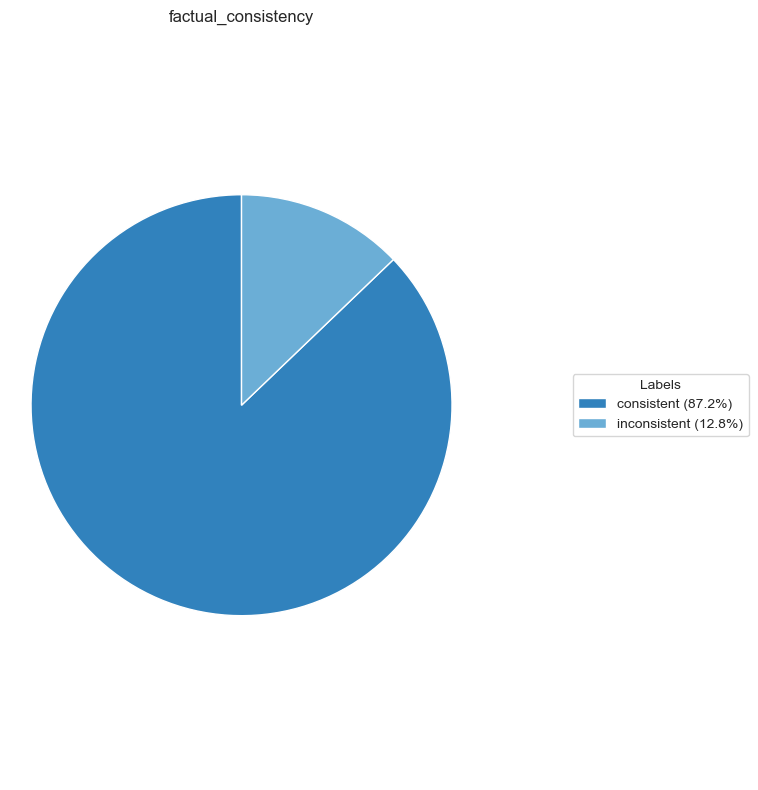

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def plot_pie_for_column(ax, df, column_name, colormap):
    # Extract sizes and labels for the given column
    sizes = df[column_name].value_counts().values
    labels = df[column_name].value_counts().index

    # Calculate percentages for the legend
    total = np.sum(sizes)
    percentages = [f"{label} ({size/total:.1%})" for label, size in zip(labels, sizes)]

    # Use the colormap to get consistent colors for the labels
    colors = [colormap[label] for label in labels]

    # Plot pie chart
    wedges = ax.pie(sizes, colors=colors, startangle=90)[0]

    # Adjust axis and add legend
    ax.axis('equal')
    ax.legend(wedges, percentages, title="Labels", loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1))

    # Set title centered above the pie chart
    ax.set_title(column_name, position=(0.5, 1.05))

# Extract unique labels for the 'Logical Consistency' column
all_labels = F3_Consistency['factual_consistency'].dropna().unique()

# Assign unique colors from a colormap to each label
colormap = {label: color for label, color in zip(all_labels, plt.cm.tab20c.colors)}

# Create a figure
fig, ax = plt.subplots(figsize=(8, 8))

# Plot 'Logical Consistency' column
plot_pie_for_column(ax, F3_Consistency, 'factual_consistency', colormap)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [50]:
F3_Consistency_filtered = F3_Consistency_filtered[F3_Consistency_filtered['factual_consistency']!= 'inconsistent']

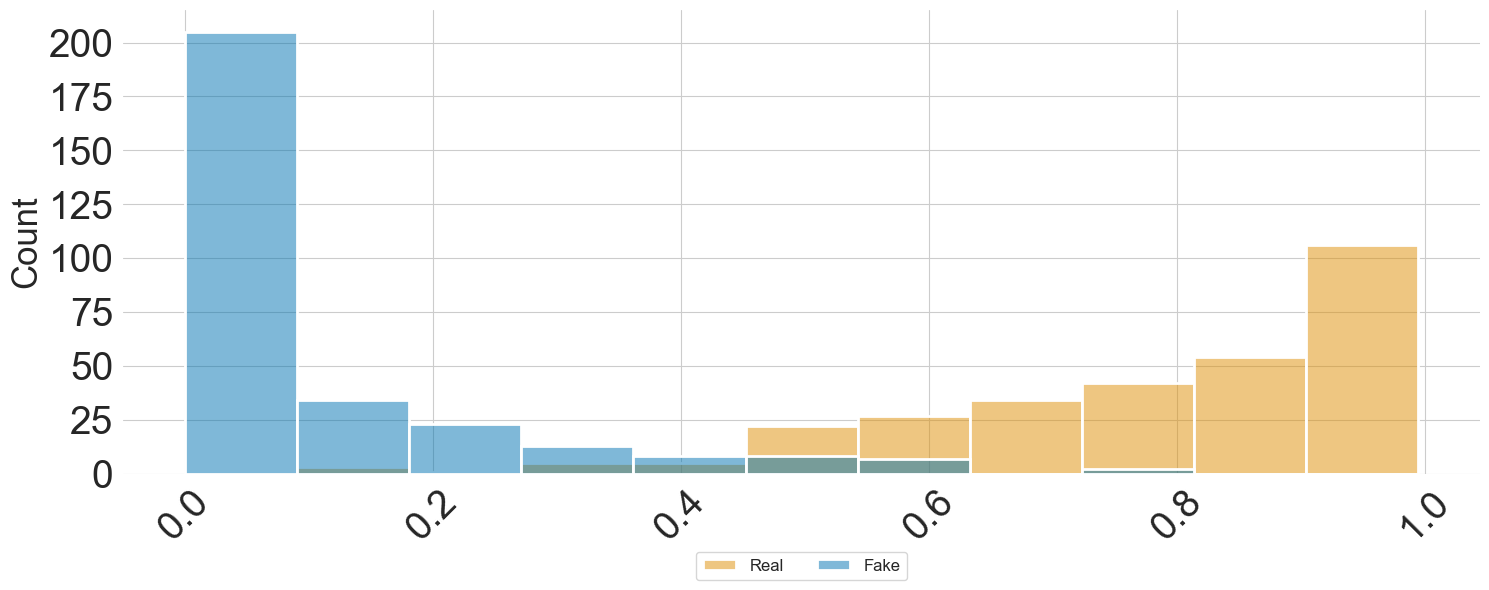

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure and white background
plt.figure(figsize=(15, 6))
sns.set_style("white")

# Plot the histogram
ax = sns.histplot(
    data=F3_Consistency, x="AlignScore", hue="ai_generated_label",
    fill=True, common_norm=False, palette="colorblind",
    alpha=.5, linewidth=2
)

# Set the title and labels
plt.xlabel('AlignScore', fontsize=20)
plt.ylabel('Count', fontsize=20)

# Display legend at the bottom in a horizontal line
plt.legend( labels=['Real', 'Fake'],
           fontsize='large', title_fontsize='20',
           loc='upper center', bbox_to_anchor=(0.5, -0.15),
           ncol=2)  # We set ncol=2 since there are two labels: 'Real' and 'Fake'


# Increase the size of the numbers on the y and x axes
ax.tick_params(axis='both', labelsize=17)  # Adjust '14' to your desired font size

# Show grid
ax.grid(True)

# Display only horizontal grid lines
ax.yaxis.grid(False)

# Remove borders
for spine in ax.spines.values():
    spine.set_visible(False)

# Display only horizontal grid lines
ax.yaxis.grid(True)  # <-- This is the line that adds the horizontal grid

# Set the rotation of the x-axis tick labels
plt.xticks(rotation=45, fontsize=28)  # Change rotation to 45 degrees for inclination
plt.yticks(fontsize=28)
plt.xlabel('', fontsize=25)
plt.ylabel('Count', fontsize=25)

# Adjust layout to fit legend
plt.tight_layout()

# Display the plot
plt.show()


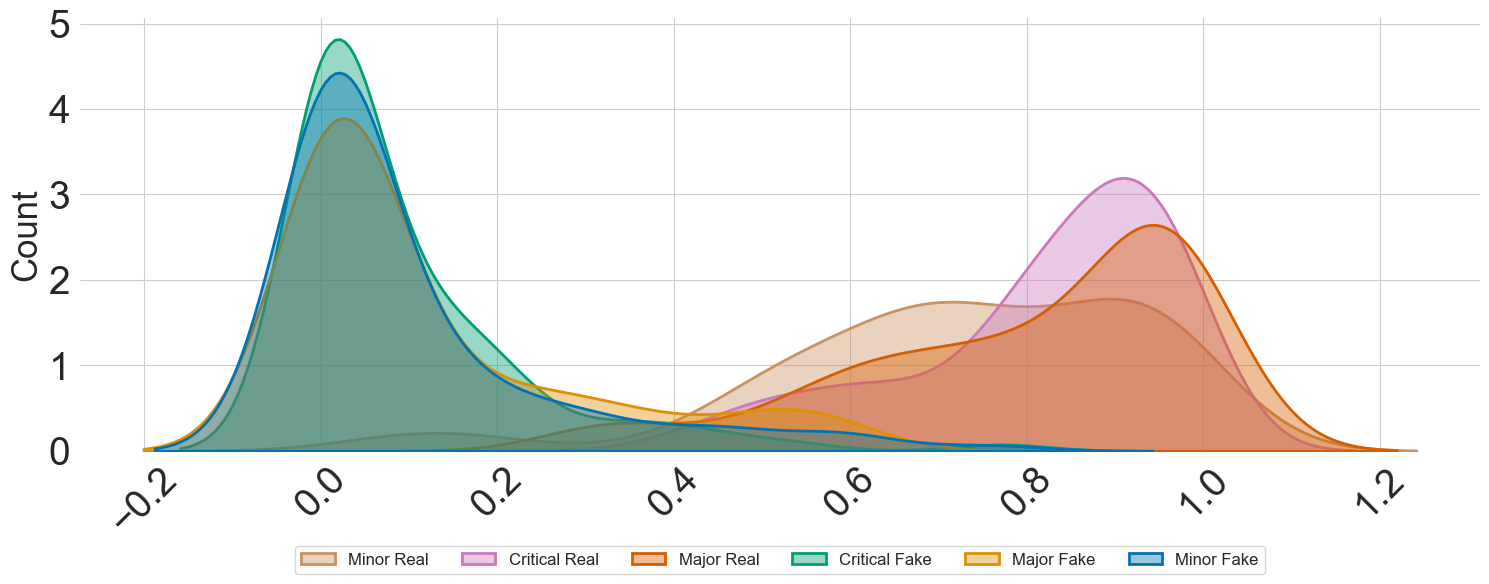

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure and white background
plt.figure(figsize=(15, 6))
sns.set_style("white")

# Define a color palette. Adjust the colors as per your requirements.
unique_veracity = F3_Consistency['Prompt Veracity'].unique()
# palette = dict(zip(unique_veracity, sns.color_palette("tab10", len(unique_veracity))))

# KDE plot
ax = sns.kdeplot(
    data=F3_Consistency, x="AlignScore", hue="Prompt Veracity",
    fill=True, common_norm=False, palette="colorblind",
    alpha=.4, linewidth=2,
)

# Set the title and labels
# plt.title('Distribution of AlignScore by Veracity', fontsize=18)
plt.xlabel('AlignScore', fontsize=20)
plt.ylabel('Density', fontsize=20)

# Display legend at the bottom in a horizontal line
plt.legend( labels= ['Minor Real','Critical Real', 'Major Real', 'Critical Fake','Major Fake','Minor Fake'],
           fontsize='large', title_fontsize='20',
           loc='upper center', bbox_to_anchor=(0.5, -0.2),
           ncol=len(unique_veracity))


# Increase the size of the numbers on the y and x axes
ax.tick_params(axis='both', labelsize=17)  # Adjust '14' to your desired font size

# Show grid
ax.grid(True)

# Display only horizontal grid lines
ax.yaxis.grid(False)

# Remove borders
for spine in ax.spines.values():
    spine.set_visible(False)

# Display only horizontal grid lines
ax.yaxis.grid(True)  # <-- This is the line that adds the horizontal grid

# Set the rotation of the x-axis tick labels
plt.xticks(rotation=45, fontsize=28)  # Change rotation to 45 degrees for inclination
plt.yticks(fontsize=28)
plt.xlabel('', fontsize=25)
plt.ylabel('Count', fontsize=25)

# Adjust layout to fit legend
plt.tight_layout()

# Display the plot
plt.show()


In [55]:
F3_Consistency=F3_Consistency_filtered

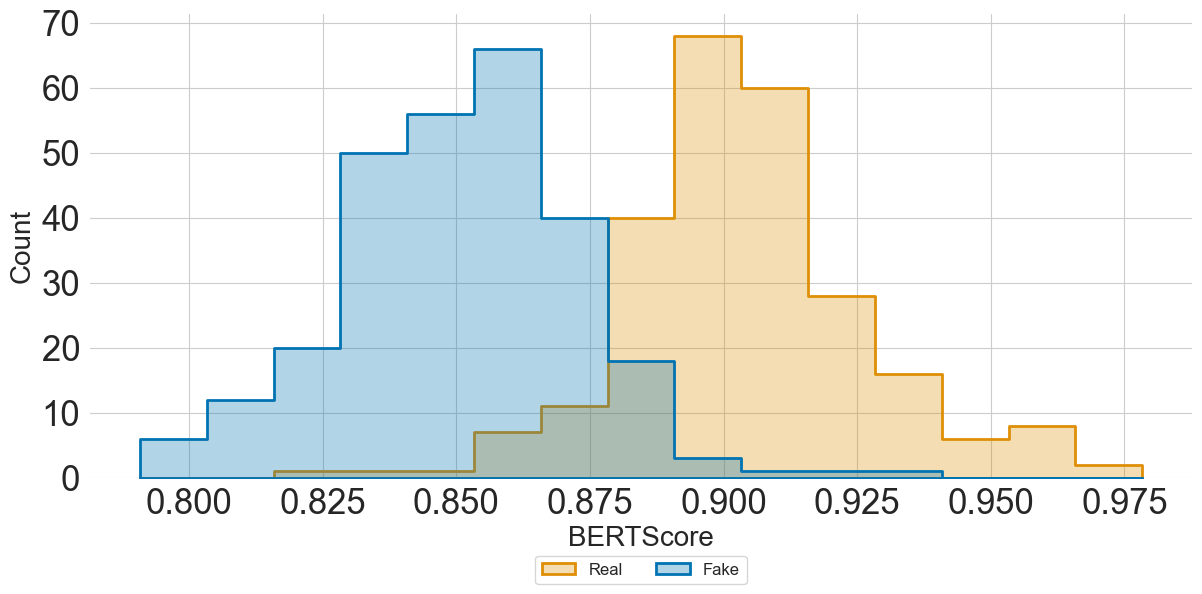

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure and white background
plt.figure(figsize=(12, 6))
sns.set_style("white")

# Plot the histogram
ax = sns.histplot(
    data=F3_Consistency, x="BERTScore_F1", hue="ai_generated_label",
    fill=True, element="step",  common_norm=False, palette="colorblind",
    alpha=.3, linewidth=2
)

# Set the title and labels
plt.xlabel('BERTScore', fontsize=20)
plt.ylabel('Count', fontsize=20)

# Display legend at the bottom in a horizontal line
plt.legend( labels=['Real', 'Fake'],
           fontsize='large', title_fontsize='20',
           loc='upper center', bbox_to_anchor=(0.5, -0.15),
           ncol=2)  # We set ncol=2 since there are two labels: 'Real' and 'Fake'


# Increase the size of the numbers on the y and x axes
ax.tick_params(axis='both', labelsize=17)  # Adjust '14' to your desired font size

# Show grid
ax.grid(True)

# Display only horizontal grid lines
# ax.yaxis.grid(False)

# Remove borders
for spine in ax.spines.values():
    spine.set_visible(False)



# Adjust layout to fit legend
plt.tight_layout()

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# Display the plot
plt.show()


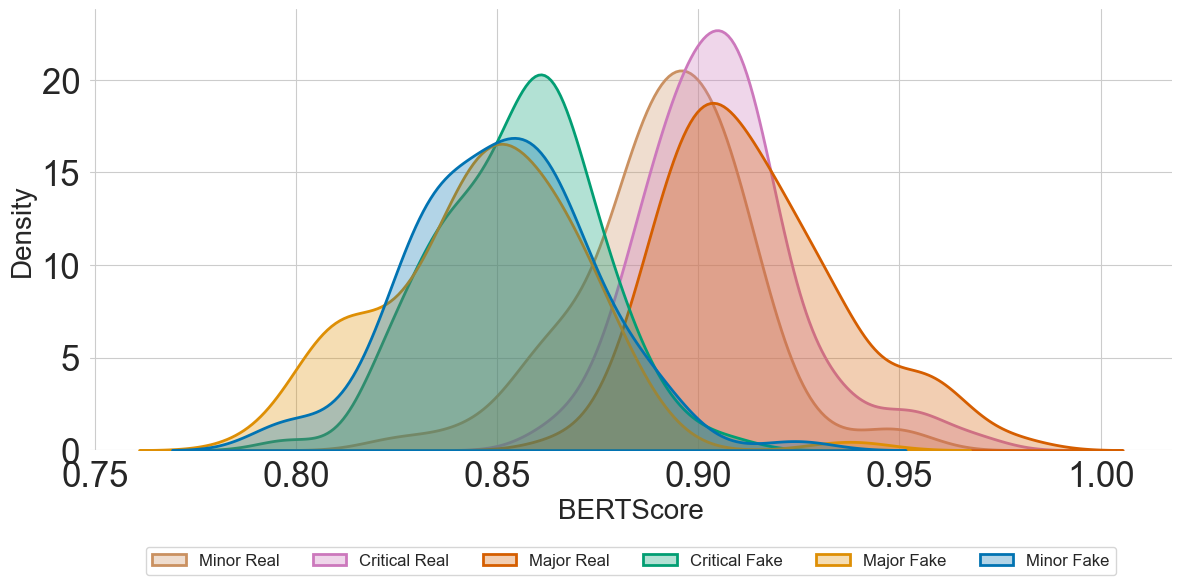

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure and white background
plt.figure(figsize=(12, 6))
sns.set_style("white")

# Define a color palette. Adjust the colors as per your requirements.
unique_veracity = F3_Consistency['Prompt Veracity'].unique()
# palette = dict(zip(unique_veracity, sns.color_palette("tab10", len(unique_veracity))))

# KDE plot
ax = sns.kdeplot(
    data=F3_Consistency, x="BERTScore_F1", hue="Prompt Veracity",
    fill=True, common_norm=False, palette="colorblind",
    alpha=.3, linewidth=2,
)

# Set the title and labels
# plt.title('Distribution of AlignScore by Veracity', fontsize=18)
plt.xlabel('BERTScore', fontsize=20)
plt.ylabel('Density', fontsize=20)

# Display legend at the bottom in a horizontal line
plt.legend( labels= ['Minor Real','Critical Real', 'Major Real', 'Critical Fake','Major Fake','Minor Fake'],
           fontsize='large', title_fontsize='20',
           loc='upper center', bbox_to_anchor=(0.5, -0.2),
           ncol=len(unique_veracity))


# Increase the size of the numbers on the y and x axes
ax.tick_params(axis='both', labelsize=17)  # Adjust '14' to your desired font size

# Show grid
ax.grid(True)

# Display only horizontal grid lines
# ax.yaxis.grid(False)

# Remove borders
for spine in ax.spines.values():
    spine.set_visible(False)

# Adjust layout to fit legend
plt.tight_layout()

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# Display the plot
plt.show()

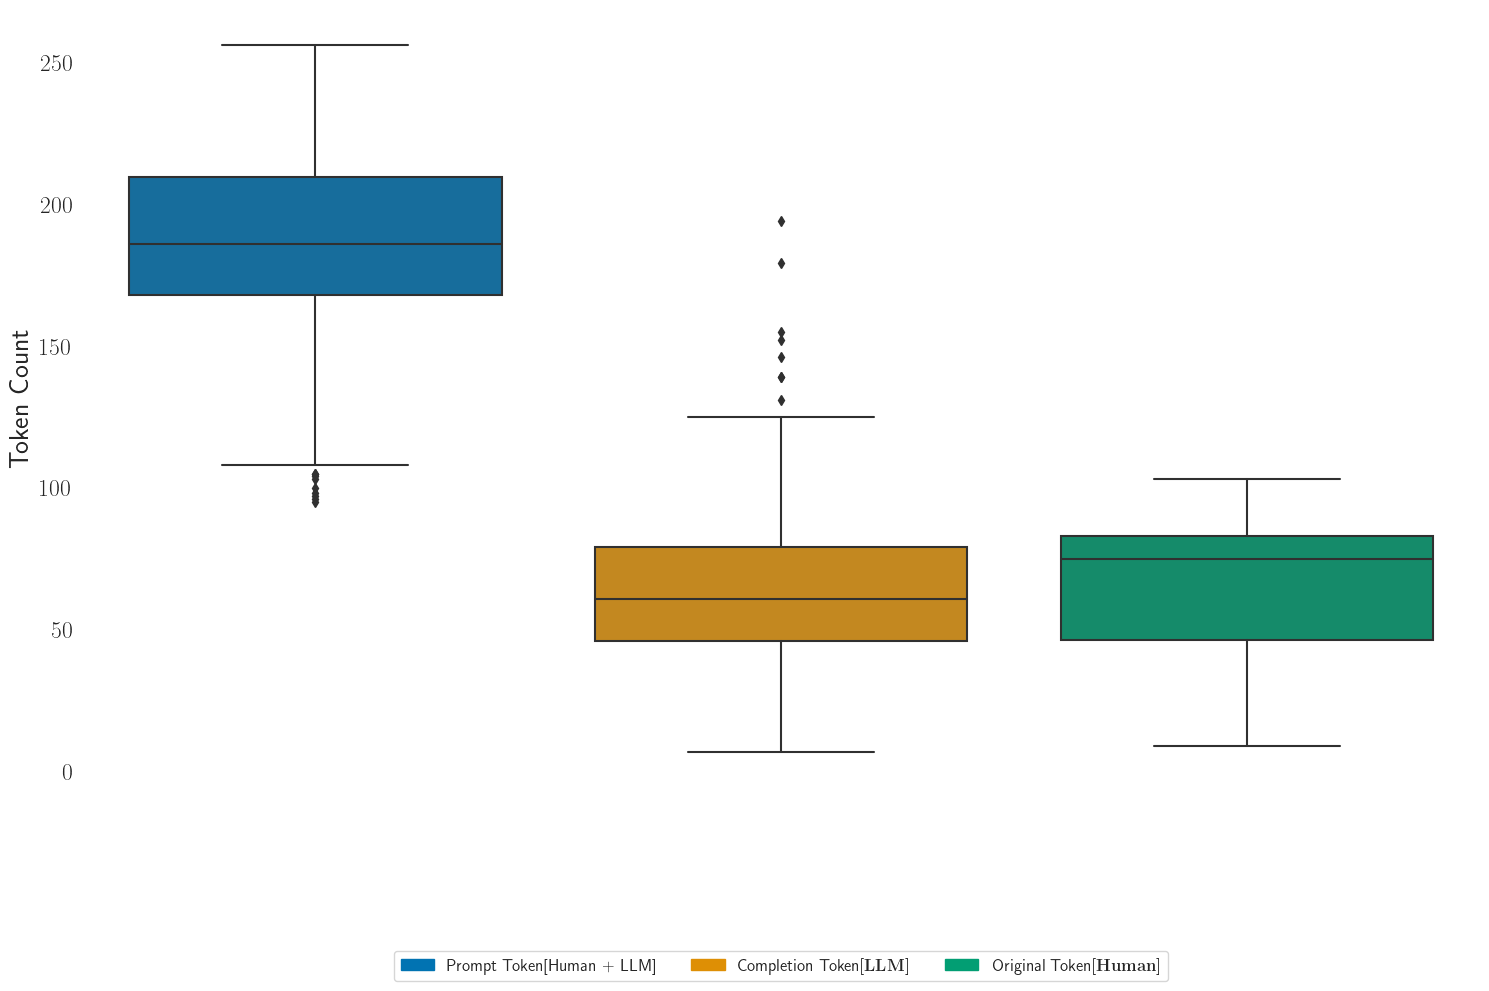

In [61]:
# Sample data
df = F3_Consistency[['num_prompt_token', 'num_completion_token', 'num_original_token']]

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Activate the LaTeX text interpreter
plt.rc('text', usetex=True)

# Set the size of the figure and white background
plt.figure(figsize=(15, 10))
sns.set_style("white")

# Create a boxplot
ax = sns.boxplot(data=df, palette="colorblind")

# Remove default x-axis labels
ax.set_xticklabels([])

# Set y-axis label and font size
ax.set_ylabel('Token Count', fontsize=20)

# Customize ticks and labels
ax.tick_params(axis='y', labelsize=17)

# Create custom legend
patch1 = mpatches.Patch(color=sns.color_palette("colorblind")[0], label='Prompt Token')
patch2 = mpatches.Patch(color=sns.color_palette("colorblind")[1], label=r'Completion Token{\bf{[LLM]}}')
patch3 = mpatches.Patch(color=sns.color_palette("colorblind")[2], label=r'Original Token{\bf{[Human]}}')

ax.legend([patch1, patch2, patch3],
          ['Prompt Token[Human + LLM]', r'Completion Token{\bf{[LLM]}}', r'Original Token{\bf{[Human]}}'],
          fontsize='large', title_fontsize='20', loc='upper center',
          bbox_to_anchor=(0.5, -0.2), ncol=3)

# Remove borders
for spine in ax.spines.values():
    spine.set_visible(False)

# Adjust layout to fit legend
plt.tight_layout()

# Display the plot
plt.show()


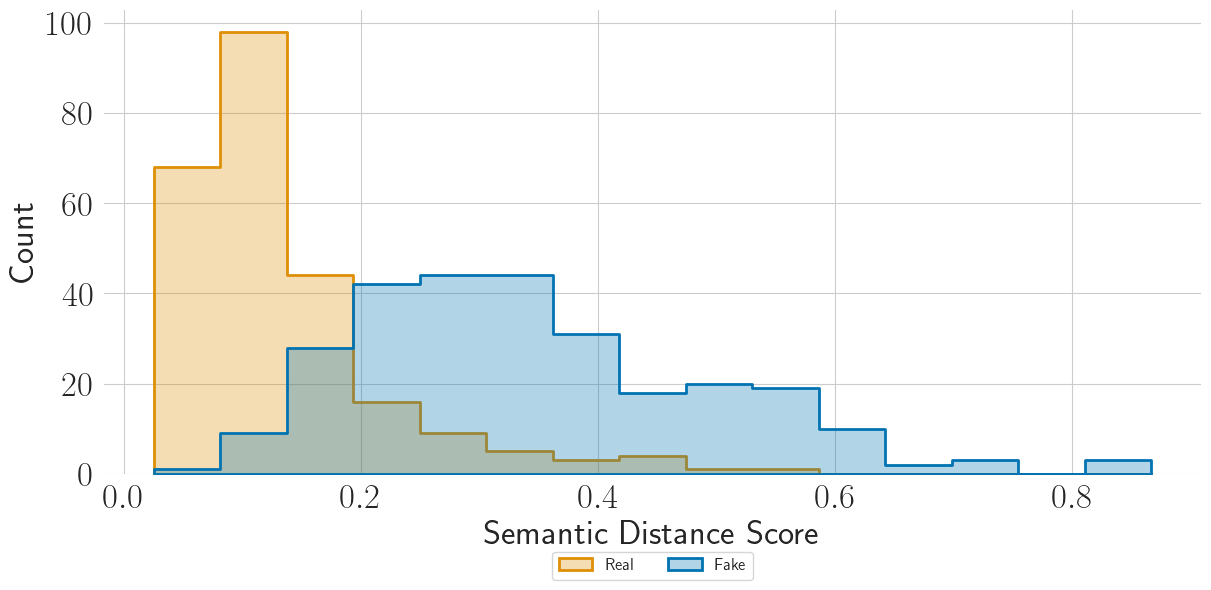

'\nLow Semantic Distance Score: Indicates that the two texts are semantically similar or close in meaning.\nHigh Semantic Distance Score: Suggests that the two texts are semantically different or distant in meaning.\n\n'

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure and white background
plt.figure(figsize=(12, 6))
sns.set_style("white")

# Plot the histogram
ax = sns.histplot(
    data=F3_Consistency, x="Semantic_Distance", hue="ai_generated_label",
    fill=True, element="step",  common_norm=False, palette="colorblind",
    alpha=.3, linewidth=2
)

# Set the title and labels
plt.xlabel('semantic_distance', fontsize=20)
plt.ylabel('Count', fontsize=20)

# Display legend at the bottom in a horizontal line
plt.legend( labels=['Real', 'Fake'],
           fontsize='large', title_fontsize='20',
           loc='upper center', bbox_to_anchor=(0.5, -0.15),
           ncol=2)  # We set ncol=2 since there are two labels: 'Real' and 'Fake'


# Increase the size of the numbers on the y and x axes
ax.tick_params(axis='both', labelsize=17)  # Adjust '14' to your desired font size

# Show grid
ax.grid(False)

# Display only horizontal grid lines
ax.yaxis.grid(False)

# Remove borders
for spine in ax.spines.values():
    spine.set_visible(False)

# Adjust layout to fit legend
plt.tight_layout()
plt.ylabel('Count', fontsize=25)
plt.xlabel('Semantic Distance Score', fontsize=25)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)



# Show grid
ax.grid(True)



# Display the plot
plt.show()

"""
Low Semantic Distance Score: Indicates that the two texts are semantically similar or close in meaning.
High Semantic Distance Score: Suggests that the two texts are semantically different or distant in meaning.

"""
